<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Frequentist Statistics**

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

##Measure of Central Tendency

In [3]:
x= st.skewnorm.rvs(10,size=1000)

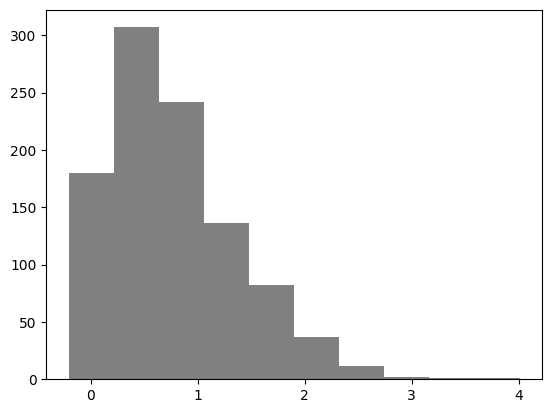

In [4]:
fig,ax = plt.subplots()
_ = ax.hist(x,color='grey')

In [5]:
xbar = x.mean()

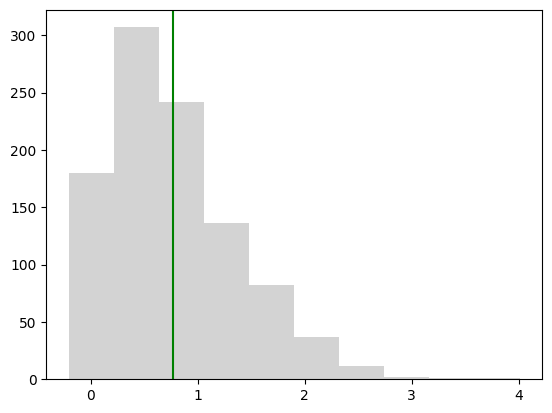

In [6]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
_ = ax.hist(x,color='lightgray')

In [7]:
med = np.median(x)

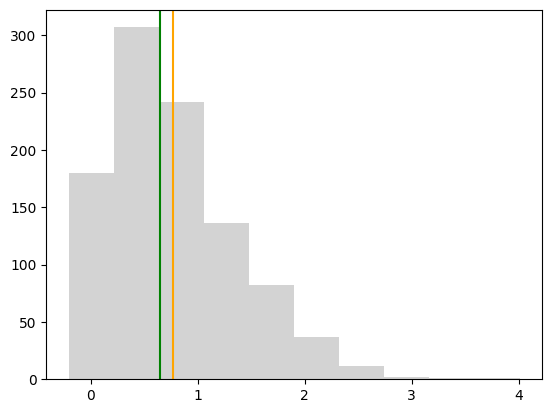

In [8]:
fig,ax = plt.subplots()
plt.axvline(med,color='green')
plt.axvline(xbar,color='orange')
_ = ax.hist(x,color='lightgray')

##Measure of Dispersion

In [9]:
vr = np.var(x)

In [10]:
sd = np.std(x)

In [11]:
sd

0.5960572059628305

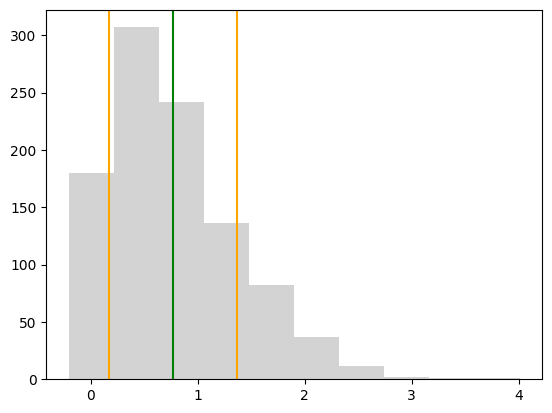

In [12]:
fig,ax = plt.subplots()
plt.axvline(xbar,color='green')
plt.axvline(xbar + sd,color='orange')
plt.axvline(xbar - sd,color='orange')
_ = ax.hist(x,color='lightgray')

##Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [13]:
sd / ((x.size )**(1/2))

0.018848983865986414

In [14]:
st.sem(x,ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

##Guassian Distribution / Normal Distribution

In [15]:
x = np.random.normal(size=10000)

In [16]:
sns.set_style('ticks')

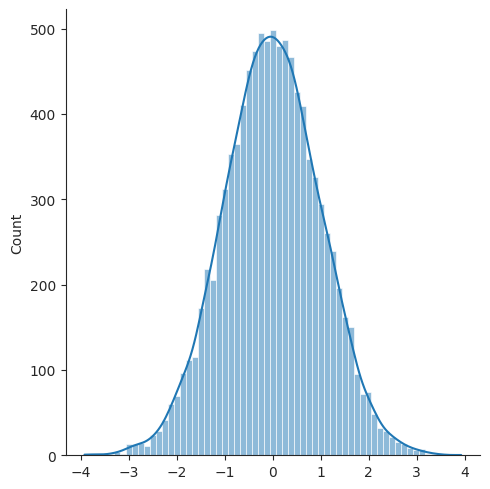

In [17]:
_ = sns.displot(x, kde=True)

In [18]:
x.std()

1.0039756140435032

##**Z-Scores**

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [19]:
(85-60)/10

2.5

In [20]:
x_i = 85
mu = 60
sigma  =10

In [21]:
x = np.random.normal(mu,sigma,size=10000)

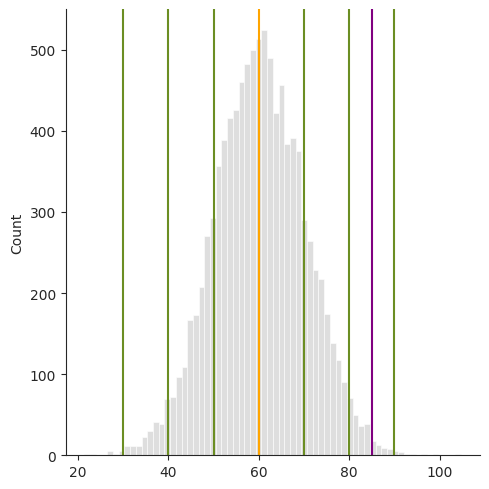

In [22]:
sns.displot(x,color='lightgray')

ax.set_xlim(0,100)
plt.axvline(mu, color='orange')
for v in [-3,-2,-1,1,2,3]:
    plt.axvline(mu+ v*sigma, color='olivedrab')

_ = plt.axvline(x_i,color='purple')

Your z-score is 2.5 standard deviations

In [23]:
## in the whole class

z = (x_i - np.mean(x))/np.std(x)
z

2.476625942263925

In [24]:
len((np.where(x>85)[0]))

54

In [25]:
100*54/10000

0.54

In [26]:
np.percentile(x,99)

83.3617286801891

In contrast, if the mean score is 90 and the std dev is 2

In [27]:
mu = 90
sigma = 2

In [28]:
y = np.random.normal(mu,sigma,size=10000)

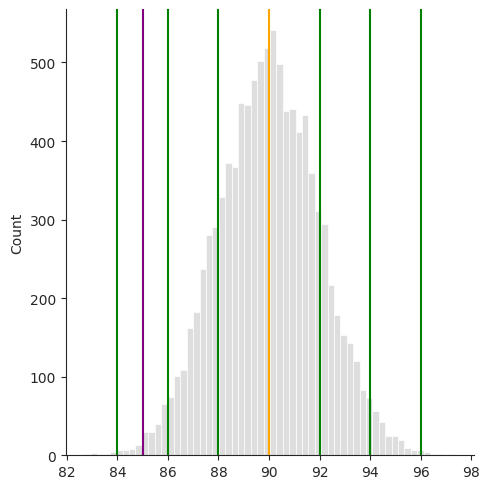

In [29]:
sns.displot(y,color='lightgray')
plt.axvline(mu, color='orange')

for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu + v*sigma,color='green')

_ = plt.axvline(x_i,color='purple')

In [30]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.506180896352216

Now the z-score is 2.5 std dev below the mean

In [31]:
len(np.where(y>85)[0])

9948

In [32]:
100*9948/10000

99.48

In [33]:
np.percentile(y,1)

85.3959716097412

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

#**p-value**

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [34]:
p_below = st.norm.cdf(-2.5)

In [35]:
p_below

0.006209665325776132

In [36]:
mu = 75
sigma = 10
c =np.random.normal(mu,sigma,size=1000000)

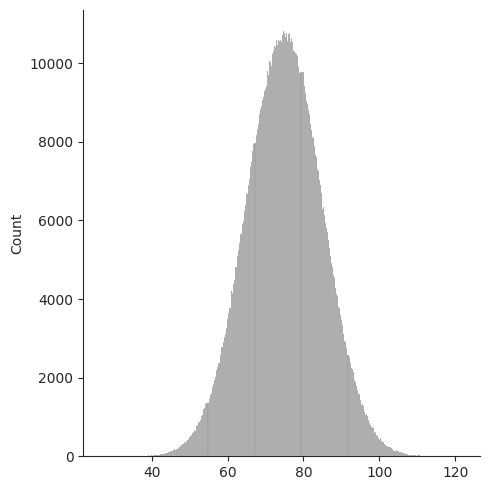

In [37]:
_=sns.displot(c,color='gray')

In [38]:
len(np.where(c>80)[0])

307995

In [39]:
308126*100/1000000

30.8126

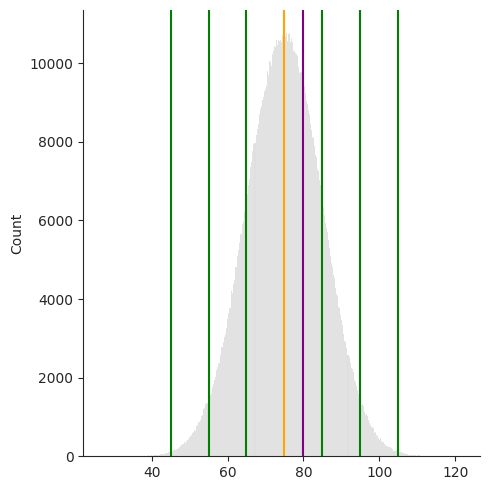

In [40]:
sns.displot(c,color='lightgray')
plt.axvline(mu, color='orange')

for v in [-3,-2,-1,1,2,3]:
  plt.axvline(mu + v*sigma,color='green')

_ = plt.axvline(x=80,color='purple')

In [41]:
zs  = (80 - np.mean(c))/np.std(c)
zs

0.5014422618218523

In [42]:
pb = st.norm.cdf(-0.5)

In [43]:
pu = 1 - st.norm.cdf(0.5)

In [44]:
pu * 1000000   #### these are above the z score of 0.5

308537.5387259869

In [45]:
pb * 1000000    ### they are the number of people under z-score of 0.5 in a infinite number of class

308537.5387259869

In [46]:
(308537 + 308537)/1000000

0.617074

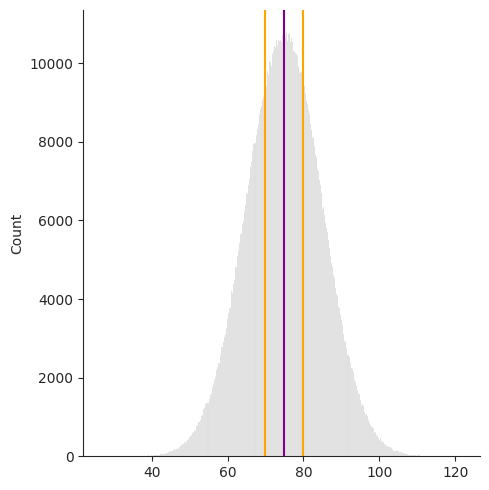

In [47]:
sns.displot(c,color='lightgray')

plt.axvline(mu + 0.5 * sigma,color='orange')
plt.axvline(mu,color='purple')
_ = plt.axvline(mu - 0.5*sigma,color='orange')

In [48]:
### probability to have any score to be out or below the 0.5 times std dev above or below the means is

p_outside = pu + pb
p_outside

0.6170750774519738

In [49]:
p_outside * 1000000  ## number of values outside the z-score std dev


617075.0774519738

In other words, assuming a normal distribution, the probability (the *p*-value) of a sampled value being at least 0.5 standard deviations away from the mean by chance alone is $p \approx 0.617$.

The frequentist convention is that if a *p*-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha = .05$.

For example, with a fair coin, the probability of throwing six heads *or* six tails in a six-coin-flip experiment is 0.03125 ($p = 0.015625$ for *either of* six heads or six tails). Refer back to the `coinflip_prob()` method from the [*Probability* notebook](https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/5-probability.ipynb) for proof.

If a friend of yours hands you a coin, the **null hypothesis** (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should *reject the null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p < .05$.

The z-scores correspinding to a= 0.05 can be obtained from the normal distribution's `percent point function, ppf`, which facilitates the inverse of cdf. to capture 95 % of values around the mean, we leave 2.5% at the bottom of teh distribution and 2.5% at the top:

In [50]:
st.norm.ppf(0.025)

-1.9599639845400545

In [51]:
st.norm.ppf(1-0.025)

1.959963984540054

Thus, at the traditional a = 0.05, a sampled value with z-score less than -1.96 or greater than 1.96 would be considered statisticallty significant.

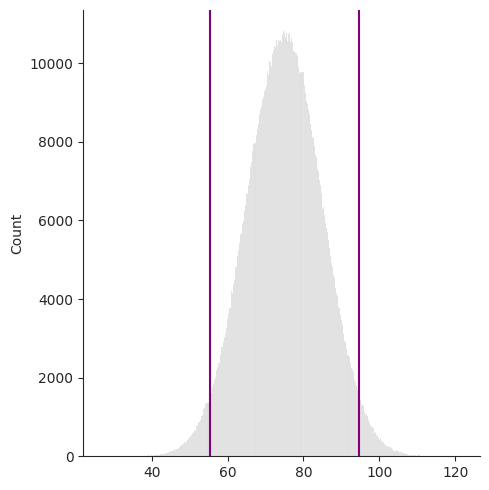

In [52]:
sns.displot(c,color='lightgray')

plt.axvline(mu - 1.96 * sigma, color='purple')
_ = plt.axvline(mu + 1.96 * sigma, color='purple')

##**Comparing Means with t-Tests**

Where z-scores apply to individuals only, t-tests enables us to compare the(mean of) of a sample pf multiple values to a reference mean.

## Student's single-sample t-tests

Named after William Sealy Gosset, an Oxford-trained scientist and mathematician, who became a stout yield statistician for Guinness in Dublin (from 1899 to his fatal heart attack in 1937 shortly after being promoted to head brewer). Alongside sabbaticals in Karl Pearson's UCL Biometric Laboratory, Gosset published under the pseudonym Student (including on the *t*-test, starting in 1908) as it was against Guinness policy to publish.

Recalling the formula for calculating a *z*-score:
$$ z = \frac{x_i-\mu}{\sigma} $$

The **single-sample *t*-test** is a variation on the theme and is defined by:
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Where:
* $\bar{x}$ is the sample mean
* $\mu_0$ is a reference mean, e.g., known population mean or "null hypothesis" mean
* $s_{\bar{x}}$ is the sample standard error

Let's say you're the head brewer at Guinness. Your baseline brewing process yields 50L of stout. Using a new genetically-modified yeast, you obtain the following yields (all in liters) in four separate experiments:

In [53]:
x = [48,50,54,60]

In [54]:
xbar = np.mean(x)
xbar

53.0

In [55]:
sx = st.sem(x)
sx

2.6457513110645907

In [56]:
t = (xbar - 50)/sx
t

1.1338934190276817

We can convert t-value into a p-value.

In [57]:
def p_from_t(my_t,my_n):
  return 2* st.t.cdf(-abs(my_t),my_n-1)    ## second arg is ddof

In [58]:
p_from_t(t,len(x))

0.3392540508564543

(An illustration of **degrees of freedom**: If we know the mean of the array `x`, three of its four values can vary freely. That is, if we know three of the values in the array, the fourth has no "freedom"; it must be a specific value. Thus, the most common situation with statistical tests is that we have *n*-1 degrees of freedom.)

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method:


In [59]:
st.ttest_1samp(x,50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

##**Welch's Independent t-tests**

In ordinary circumstances, if we have two samples whose means we'd like to compare, we use an **independent t-test**

In [60]:
penguins = sns.load_dataset('penguins').dropna()  ## some rows may have missing data

In [61]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [62]:
np.unique(penguins.species,return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [63]:
adelie = penguins[penguins.species=='Adelie']

In [64]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [65]:
np.unique(adelie.island,return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [66]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

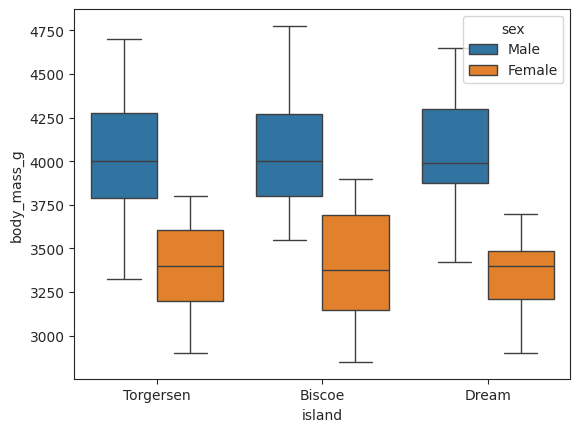

In [67]:
_ = sns.boxplot(x='island',y = 'body_mass_g',hue='sex' , data = adelie)

Mass doesa not appear to vary by islands, so we can feel comfortable grouping the data together by island. Weight does, however, appear to vary by sex :

In [68]:
f = adelie[adelie.sex=='Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [69]:
m = adelie[adelie.sex=='Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [70]:
fbar = f.mean()
fbar

3.368835616438356

In [71]:
mbar = m.mean()
mbar

4.043493150684932

To quantify whether males weigh significantly more than females, we can use the **Welch *t*-test**, devised by the 20th c. British statistician Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Where:
* $\bar{x}$ and $\bar{y}$ are the sample means
* $s^2_x$ and $s^2_y$ are the sample variances
* $n_x$ and $n_y$ are the sample sizes

**N.B.**: Student's independent *t*-test is markedly more popular than Welch's, but Student's assumes equal population variances (i.e., $\sigma^2_x \approx \sigma^2_y$), making it less robust. In case you're curious, Student's formula is the same as Welch's, except that it uses a pooled variance $s^2_p$ in place of individual sample variances ($s^2_x$ and $s^2_y$). You can read more about it [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test).

In [72]:
sf = np.var(f,ddof=1)
sm = np.var(m,ddof=1)

In [73]:
nf = f.size
nm = m.size

In [74]:
t = (fbar-mbar)/(((sf)/len(f)) + (sm)/len(m) )**(1/2)

In [75]:
t

-13.126285923485879

Degrees of freedom for calculating the *p*-value are estimated using the [Welch–Satterthwaite equation](https://en.wikipedia.org/wiki/Welch–Satterthwaite_equation), which we won't detail but is defined as:






In [76]:
def ws_eqn(sx , sy, nx, ny):
  return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [77]:
df  = ws_eqn(sf, sm, nf, nm)

In [78]:
df

135.69357893530386

In [79]:
# wuth all these info, we can pass them to p from t

p  = 2* st.t.cdf(-abs(t),df) ## or p_from_t(t, df+1)

p

6.402319748031518e-26

In [80]:
-np.log10(p)

25.193662639886046

In [81]:
st.ttest_ind(m,f,equal_var = False)

TtestResult(statistic=13.126285923485879, pvalue=6.402319748031518e-26, df=135.69357893530386)

##**Student's Paired t-tests**

Occasionally, we have two vectors where each element in vector *x* has a corresponding element in vector *y*.

For example, we could run an experiment where Alzheimer's disease patients receive a drug on one day (experimental condition) and a sugar pill placebo (control condition) on another day. We can then measure the patients' forgetfulness on both days to test whether the drug has a significant impact on memory.

For a given sample size, such a paired *t*-test is more powerful relative to an unpaired (independent) *t*-test because the variance of *x* is directly related to the variance in *y*: A severe Alzheimer's patient will tend to be relatively forgetful on both days, while a mild Alzheimer's patient will tend to be relatively unforgetful on both days. With paired samples, we capture this power by comparing the *difference* between *x* and *y*, e.g., the difference in forgetfulness for a given patient when given the drug relative to when given the sugar pill.

In contrast, consider the penguin dataset, wherein we wouldn't be able to obviously pair a given male penguin with a correponding female penguin. Or consider a situation where we provide a drug to one set of Alzheimer's patients while we provide a placebo to an entire different (an independent) group of patients. Indeed, with an independent *t*-test we could even have different sample sizes in the two groups whereas this is impossible with a paired *t*-test.

Here is an example:

In [82]:
exercise =  sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


There are 30 people in the dataset, with their pulse taken at three different time points in an experiment(after 15 mnts, 30 mnts). Ten people were assigned to each of three activity groups

In [83]:
np.unique(exercise.kind,return_counts =True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

In [84]:
np.unique(exercise.diet,return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

For simplicity, lets consider one of the six experimnetal groups, say walking no-fat diet

In [85]:
walk_no = exercise[(exercise.kind=='walking') & (exercise.diet=='no fat')]

In [86]:
walk_no

,Unnamed: 0,id,diet,pulse,time,kind
45,45,16,no fat,84,1 min,walking
46,46,16,no fat,86,15 min,walking
47,47,16,no fat,89,30 min,walking
48,48,17,no fat,103,1 min,walking
49,49,17,no fat,109,15 min,walking
50,50,17,no fat,90,30 min,walking
51,51,18,no fat,92,1 min,walking
52,52,18,no fat,96,15 min,walking
53,53,18,no fat,101,30 min,walking
54,54,19,no fat,97,1 min,walking


Note that participant-16 has relatively a low heart-rate at all three timepoints, whereas participant-20 has relatively high heart-rate.

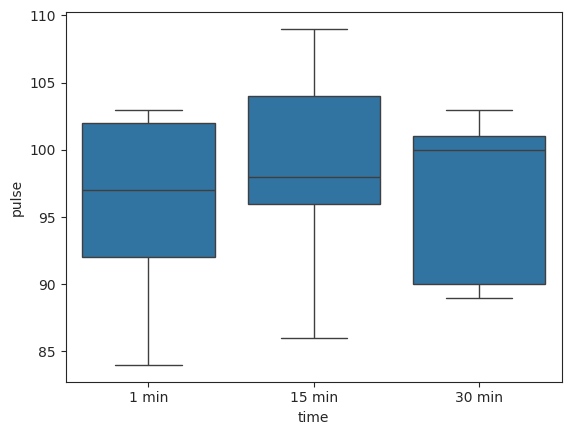

In [87]:
_ = sns.boxplot(x='time', y= 'pulse', data = walk_no)

In [88]:
min1 = walk_no[walk_no.time=='1 min']['pulse'].to_numpy()
min1

array([ 84, 103,  92,  97, 102])

In [89]:
min15 = walk_no[walk_no.time=='15 min']['pulse'].to_numpy()
min15

array([ 86, 109,  96,  98, 104])

In [90]:
min30 = walk_no[walk_no.time=='30 min']['pulse'].to_numpy()
min30

array([ 89,  90, 101, 100, 103])

In [91]:
min1.mean()

95.6

In [92]:
min15.mean()

98.6

In [93]:
min30.mean()

96.6

With paired samples, we can plot a scaterplot, which would not make any sense, in independent samples.

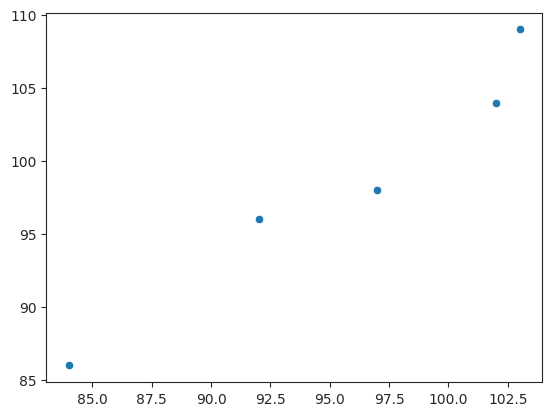

In [94]:
_ = sns.scatterplot(x=min1,y=min15)

To assess whether the mean heart rate varies significantly after one minute of walking relative to after 15 minutes, we can use Student's **paired-sample** (a.k.a., **dependent**) *t*-test:
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$
Where:
* $d$ is a vector of the differences between paired samples $x$ and $y$
* $\bar{d}$ is the mean of the differences
* $\mu_0$ will typically be zero, meaning the null hypothesis is that there is no difference between $x$ and $y$
* $s_\bar{d}$ is the standard error of the differences

In [95]:
d  = min15 - min1
d

array([2, 6, 4, 1, 2])

In [96]:
dbar = d.mean()
dbar

3.0

In [97]:
sd = st.sem(d)
sd

0.8944271909999159

In [98]:
t = (dbar-0)/sd
t

3.3541019662496847

In [99]:
p_from_t(t,d.size)

0.02846020325433834

In [100]:
st.ttest_rel(min15,min1)

TtestResult(statistic=3.3541019662496847, pvalue=0.02846020325433834, df=4)

In [101]:
st.ttest_ind(min15,min1)

TtestResult(statistic=0.5729114862838532, pvalue=0.5824447983801297, df=8.0)

##Machine Learning Examples

* Single-sample: Does my stochastic model tend to be more accurate than an established benchmark?
* Independent samples: Does my model have unwanted bias in it, e.g., do white men score higher than other demographic groups with HR model?
* Paired samples: Is new TensorFlow.js model significantly faster? (paired by browser / device)

**Exercises**
1. You run four additional experiments with your GMO brewing yeast and now have the following eight stout yields: `[48, 50, 54, 60, 49, 55, 59, 62]`. What is the *t*-statistic and is it significantly different from the 50L-yielding baseline process?
2. Does the flipper length of Adélie penguins from Dream island vary significantly by sex?
2. Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?



##**Q.No.1**

In [102]:
# 1. single sample t-test

x  = [48,50,54,60,49,55,59,62]

In [103]:
xbar = np.mean(x)
xbar

54.625

In [104]:
sx = st.sem(x)
sx

1.8892317032517287

In [105]:
t  = (xbar- 50)/sx
t

2.448085108904054

In [106]:
p = 2 * st.t.cdf(-abs(t),len(x)-1)
p

0.0442312968303811

In [107]:
pf = st.ttest_1samp(x,50)
pf

TtestResult(statistic=2.448085108904054, pvalue=0.0442312968303811, df=7)

it is significantly different

##**Q.no.2**

In [108]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [109]:
male_flipper = adelie[(adelie.sex=='Male') & (adelie.island=='Dream')]['flipper_length_mm'].to_numpy()/100
male_flipper

array([1.78, 1.84, 1.96, 1.9 , 1.84, 1.95, 1.96, 1.9 , 1.82, 1.91, 1.94,
       1.9 , 1.89, 2.05, 1.86, 2.08, 1.96, 1.92, 1.99, 1.9 , 2.  , 1.93,
       1.87, 1.9 , 1.85, 1.9 , 1.93, 2.01])

In [110]:
female_flipper = adelie[(adelie.sex=='Female') &  (adelie.island=='Dream')]['flipper_length_mm'].to_numpy()/100
female_flipper

array([1.78, 1.88, 1.95, 1.8 , 1.81, 1.82, 1.86, 1.85, 1.9 , 1.91, 1.89,
       1.9 , 2.02, 1.85, 1.87, 1.9 , 1.78, 1.93, 1.87, 1.91, 1.85, 1.93,
       1.88, 1.92, 1.84, 1.95, 1.87])

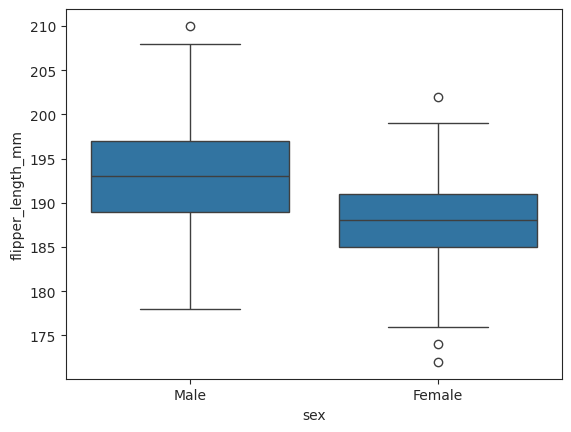

In [111]:
_= sns.boxplot(x='sex',y='flipper_length_mm',data=adelie)

In [112]:
### welch's t-test

In [113]:
mbar = np.mean(male_flipper)
mbar

1.919285714285714

In [114]:
fbar = np.mean(female_flipper)
fbar

1.8785185185185187

In [115]:
mvar = male_flipper.var(ddof=1)
fvar = np.var(female_flipper,ddof=1)
mvar,fvar

(0.0046291005291005235, 0.003036182336182332)

In [116]:
mlen = male_flipper.size
flen = len(female_flipper)

mlen,flen

(28, 27)

In [117]:
t =  (fbar - mbar)/(((fvar/flen)+(mvar/mlen))**(1/2))
t

-2.446038619999167

In [118]:
df = ws_eqn(fvar, mvar, flen, mlen)
df

51.48552818449217

In [119]:
p = 2 * st.t.cdf(-abs(t),df)
p

0.017898599613025062

In [120]:
st.ttest_ind(female_flipper,male_flipper,equal_var=False)

TtestResult(statistic=-2.446038619999167, pvalue=0.017898599613025062, df=51.48552818449217)

it is significantly different

##**Q.No.3**

Was the heart rate of low-fat dieters different after one minute of rest relative to after 15 minutes of rest?

In [121]:
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [122]:
rest_low = exercise[(exercise.diet=='low fat') & (exercise.kind=='rest')]
rest_low

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


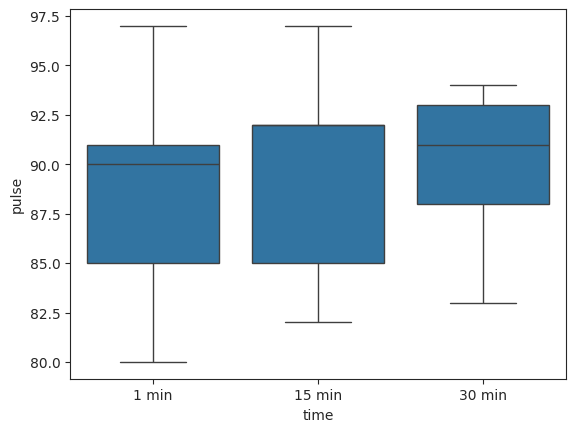

In [123]:
_ = sns.boxplot(x='time',y='pulse',data=rest_low)

In [124]:
low_1 = exercise[(exercise.diet=='low fat') & (exercise.time=='1 min') & (exercise.kind=='rest')]['pulse'].to_numpy()

low_1

array([85, 90, 97, 80, 91])

In [125]:
low_15  = exercise[(exercise.diet=='low fat') & (exercise.time=='15 min') & (exercise.kind=='rest')]['pulse'].to_numpy()
low_15

array([85, 92, 97, 82, 92])

In [126]:
d = low_15 - low_1
d

array([0, 2, 0, 2, 1])

In [127]:
sd = st.sem(d)

In [128]:
sd

0.4472135954999579

In [129]:
t = (d.mean()-0)/sd
t

2.23606797749979

In [130]:
2 * st.t.cdf(-abs(t),d.size-1)

0.08900934250008564

In [131]:
st.ttest_rel(low_15,low_1)

TtestResult(statistic=2.23606797749979, pvalue=0.08900934250008564, df=4)

It is not significantly different

#**Confidence Interval**

When examining sample means as we have been for the *t*-test, a useful statistical tool is the **confidence interval** (CI), which we for example often see associated with polling results when there's an upcoming election. CIs allow us to make statements such as "there is a 95% chance that the population mean lies within this particular range of values".

We can calculate a CI by rearranging the *z*-score formula:
$$ \text{C.I.} = \bar{x} \pm z \frac{s}{\sqrt{n}} $$
Where:
* $\bar{x}$ is the sample mean
* $s$ is the sample standard deviation
* $n$ is the sample size
* $z$ corresponds to a *z*-score threshold (e.g., the most common 95% CI is $z \pm 1.960$; other popular ones are the 90% CI at $z \pm 1.645$ and the 99% CI at $z \pm 2.576$)

For example, to find the 95% confidence interval for the true mean yield of our


GMO yeast:

In [132]:
x = np.array([48,50,54,60,49,55,59,62])


In [133]:
xbar = x.mean()
s = x.std()
n = x.size

In [134]:
xbar

54.625

In [135]:
z = 1.96

In [136]:
def CIerr_calc(my_z,my_n,my_s):
  return  my_z*(my_s/my_n**(1/2))

In [137]:
CIerr = CIerr_calc(z,n,s)
CIerr

3.4637403013216796

In [138]:
xbar + CIerr

58.08874030132168

In [139]:
xbar - CIerr

51.16125969867832

Therefore, there's a 95% chance that the true mean yield of our GMO yeast lies in the range of 51.2 to 58.1 liters. Since this CI doesn't overlap with the established baseline mean of 50L, this corresponds to stating that the GMO yield is significantly greater than the baseline where $\alpha = .05$, as we already determined:

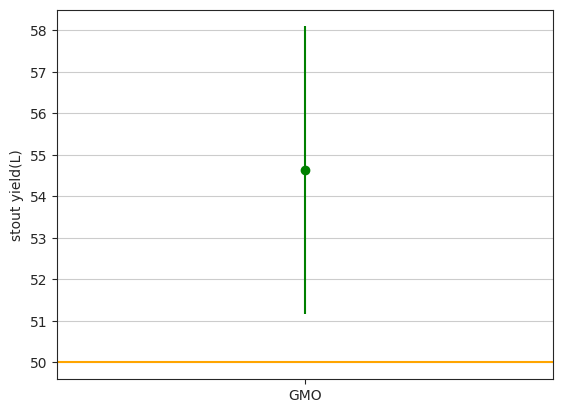

In [140]:
fig,ax = plt.subplots()
plt.ylabel('stout yield(L)')
plt.grid(axis='y')
ax.errorbar(['GMO'], [xbar], [CIerr], fmt='o', color='green')
_ = plt.axhline(50,color='orange')

Similarly, we can compare several sample means with CIs. Using penguins again:

In [141]:
fCIerr = CIerr_calc(z,nf,sf)
mCIerr = CIerr_calc(z,nm,sm)

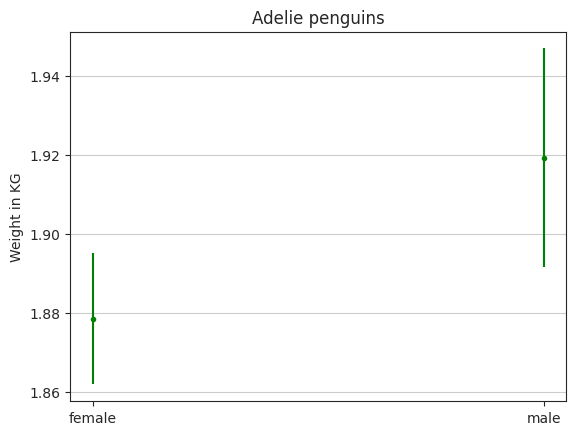

In [142]:
fig,ax = plt.subplots()
plt.title('Adelie penguins')
plt.ylabel('Weight in KG')
plt.grid(axis='y')

_ = plt.errorbar(['female','male'],[fbar,mbar],[fCIerr,mCIerr],fmt='.', color='green')


The CIs are nowhere near overlapping, corresponding to the extremely significant (-logP = 25) difference in penguin weights

In contrast, the CIs for female penguins from the three islands

In [143]:
t = adelie[(adelie.sex=='Female') & (adelie.island=='Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex=='Female') & (adelie.island=='Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex=='Female') & (adelie.island=='Dream')]['body_mass_g'].to_numpy()/1000

In [144]:
means = [t.mean(), b.mean(), d.mean()]
means

[3.3958333333333335, 3.3693181818181817, 3.3444444444444446]

In [145]:
s_t, sb, sd = t.var(ddof=1), b.var(ddof=1), d.var(ddof=1)

In [146]:
nt, nb, nd = t.size, b.size, d.size

In [148]:
CIerrors = [CIerr_calc(z,nt,s_t), CIerr_calc(z,nb,sb), CIerr_calc(z,nd,sd)]

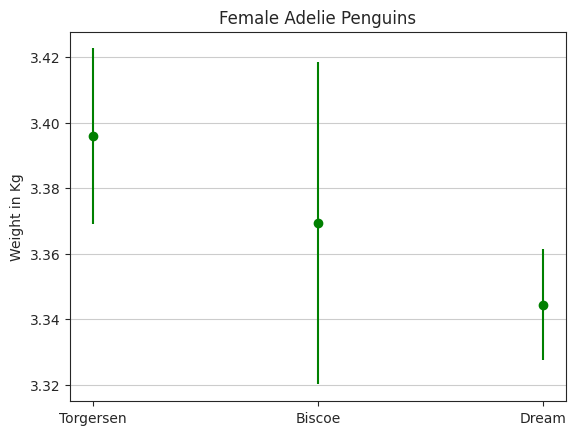

In [149]:
fig,ax = plt.subplots()
plt.title('Female Adelie Penguins')
plt.ylabel('Weight in Kg')
plt.grid(axis='y')

_ = ax.errorbar(['Torgersen', 'Biscoe', 'Dream'],means, CIerrors,fmt='o', color='green' )

##**ANOVA - Analysis of Variance**

**Analysis of variance** (ANOVA) enables us to compare more than two samples (e.g., all three islands in the case of penguin weight) in a single statistical test.

To apply ANOVA, we must make three assumptions:
1. Independent samples
2. Normally-distributed populations
3. *Homoscedasticity*: Population standard deviations are equal

In [150]:
st.f_oneway(t,b,d)

F_onewayResult(statistic=0.22627752438542714, pvalue=0.7980777848719299)

#**Pearson Correlation Coefficient**

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring (linear) relatedness exclusively. Correlation is much more common because of this difference.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [155]:
iris = sns.load_dataset('iris')

In [156]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

In [157]:
cov = -0.04215
sigma_sq_x = 0.681122
sigma_sq_y = 0.18871


In [158]:
sigma_x = sigma_sq_x **(1/2)
sigma_y = sigma_sq_y ** (1/2)

In [160]:
cov/(sigma_x * sigma_y)

-0.11756760403857937

The benifit is that we are now controlling the difference in the scales of x and y

In [161]:
st.pearsonr(iris.sepal_length,iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

In [163]:
r = st.pearsonr(iris.sepal_length, iris.petal_length)[0]
r

0.8717537758865831

We reached this point in *Probability*. Now, as for how to determine a *p*-value, we first calculate the *t*-statistic...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [164]:
t = r * (((iris.sepal_length.size-2)/(1-r**2))**(1/2))

In [165]:
t

21.646019345759765

In [172]:
p = 2 * st.t.cdf(-abs(t),iris.sepal_length.size-1)
p

7.429540721452253e-48

In [173]:
-np.log10(p)

47.129038032579125

This confirms that iris sepal length is extremely positively correlated with petal length

In [174]:
st.pearsonr(iris.sepal_length,iris.petal_length)

PearsonRResult(statistic=0.8717537758865831, pvalue=1.0386674194498827e-47)

And for reference, here's a correlation that is not significant ($r \approx 0$)

In [178]:
sns.set_style('darkgrid')

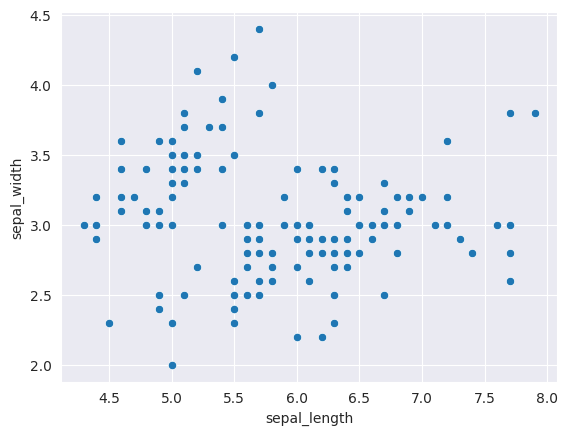

In [179]:
_ = sns.scatterplot(x =iris.sepal_length, y=iris.sepal_width)

In [180]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

##**Coefficient of Determination**

...also known as $r^2$, this is the proportion of variance in one variable explained by another.

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [181]:
rsq = r**2
rsq

0.7599546457725149

In this case, it indicates that 76% of the variance in iris petal length can be
explained by sepal length. (This is easier to understand where one variable could straightforwardly drive variation in the other; more on that in Segment 2.)

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length:

In [184]:
st.pearsonr(iris.sepal_length,iris.sepal_width)[0] **2

0.013822654141080705

###**Correlation vs Causation**

Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa.

In brief, three criteria are required for inferring causal relationships:

1. **Covariation**: Two variables vary together (this criterion is satisfied by sepal and petal length)
2. **Temporal precedence**: The affected variable must vary *after* the causal variable is varied.
3. **Elimination of extraneous variables**: We must be sure no third variable is causing the variation. This can be tricky for data we obtained through observation alone, but easier when we can control the causal variable, e.g., with (ideally double-blind) randomized control trials.

###**Correcting for multiple comparisons**

A major issue with frequentist statistics is the issue of multiple comparisons:

* If you perform 20 statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a *false positive* or *Type I error*).
* If you perform a hundred tests in such a circumstance, then you should expect five false positives.

The most straightforward, and indeed the most widely-used, solution is the **Bonferroni correction** (named after the 20th c. Italian mathematician Carlo Emilio Bonferroni). Assuming, we'd like an overall $\alpha = .05$:

* If we're planning on conducting ten tests ($m=10$), the significance threshold for each individual test is $\frac{\alpha}{m} = \frac{.05}{10} = .005$
* With 20 tests, it's $\frac{\alpha}{m} = \frac{.05}{20} = .0025$
* With 100 tests, it's $\frac{\alpha}{m} = \frac{.05}{100} = .0005$

(Other, less straightforward, approaches for adjusting $\alpha$ for multiple comparisons exist. They're beyond our scope, but the major ones are listed under the *General methods of alpha adjustment for multiple comparisons* heading [here](https://en.wikipedia.org/wiki/Multiple_comparisons_problem#See_also).)
